In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
Netflix_df = pd.read_csv('netflix_titles.csv')
Netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
plt.close("all")

In [5]:
print(len(Netflix_df.index))
Netflix_df.dropna(axis=0,how='any',inplace=True)
print(len(Netflix_df.index))

8807
5332


In [6]:
Netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...


In [7]:
grouped_by_type_df = Netflix_df.groupby('type')['show_id'].count().reset_index(name='count')
grouped_by_type_df

,type,count
0,Movie,5185
1,TV Show,147


<AxesSubplot: xlabel='type'>

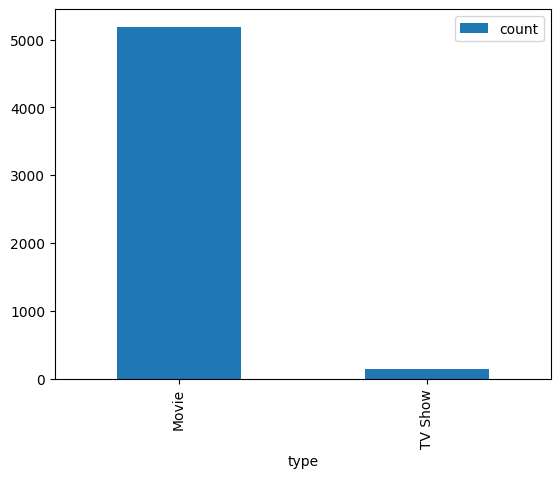

In [8]:
grouped_by_type_df.plot.bar(x='type',y='count')

In [9]:
country_list = []

for i in Netflix_df.index:
    country = Netflix_df['country'][i]
    for c in country.split(","):
        country_list.append(c)

country_df = pd.DataFrame(country_list)
country_df

grouped_by_country_df = country_df.groupby(0)[0].count().reset_index(name='count').rename(columns={0:'country'})
grouped_by_country_df['country'].replace('',np.nan,inplace=True)
grouped_by_country_df.dropna(axis=0,how='any',inplace=True)
grouped_by_country_df

,country,count
1,Afghanistan,1
2,Albania,1
3,Algeria,3
4,Angola,1
5,Argentina,13
...,...,...
170,United States,2130
171,Uruguay,7
172,Venezuela,1
173,Vietnam,7


In [10]:
top_ten_countries_df = grouped_by_country_df.sort_values(by=['count'],ascending=False).head(10)
top_ten_countries_df

,country,count
170,United States,2130
125,India,910
94,United States,355
169,United Kingdom,347
108,Canada,166
30,France,148
117,France,145
93,United Kingdom,138
16,Canada,129
161,Spain,122


<AxesSubplot: xlabel='country'>

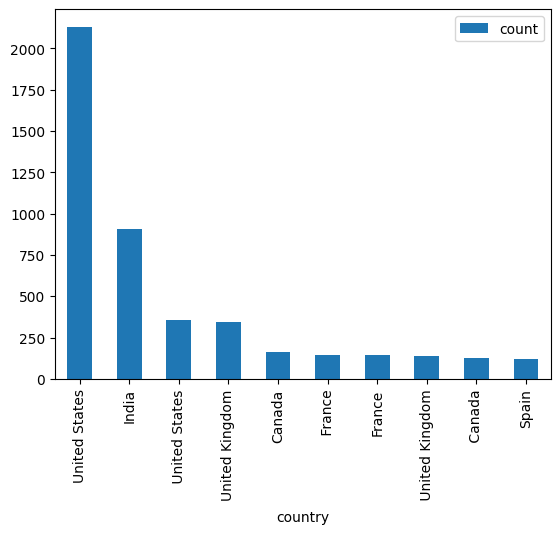

In [11]:
top_ten_countries_df.plot.bar(x='country',y='count')

In [12]:
grouped_by_release_year_df = Netflix_df.groupby('release_year')['show_id'].count().reset_index(name='count')
grouped_by_release_year_df

,release_year,count
0,1942,1
1,1944,1
2,1945,1
3,1946,1
4,1947,1
...,...,...
67,2017,657
68,2018,648
69,2019,519
70,2020,442


In [13]:
from datetime import date
todays_date = date.today()
threshold_year = int(todays_date.year) - 10
last_10_years_df = grouped_by_release_year_df.loc[grouped_by_release_year_df['release_year'] >= threshold_year]
last_10_years_df

,release_year,count
62,2012,163
63,2013,197
64,2014,242
65,2015,349
66,2016,577
67,2017,657
68,2018,648
69,2019,519
70,2020,442
71,2021,161


<AxesSubplot: xlabel='release_year'>

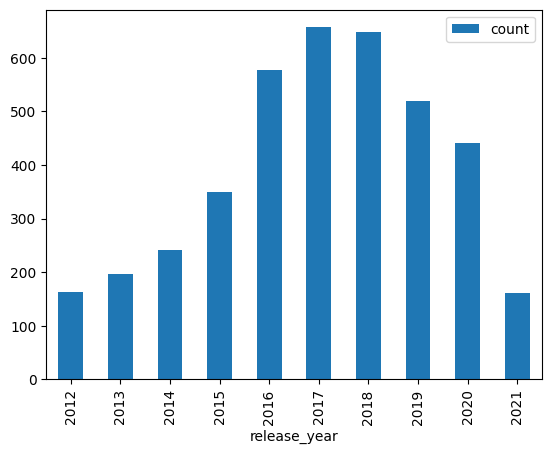

In [14]:
last_10_years_df.plot.bar(x='release_year',y='count')

In [15]:
grouped_by_ratings_df = Netflix_df.groupby('rating')['show_id'].count().reset_index(name='count')
grouped_by_ratings_df

,rating,count
0,G,40
1,NC-17,2
2,NR,58
3,PG,275
4,PG-13,470
5,R,778
6,TV-14,1214
7,TV-G,84
8,TV-MA,1822
9,TV-PG,431


<AxesSubplot: xlabel='rating'>

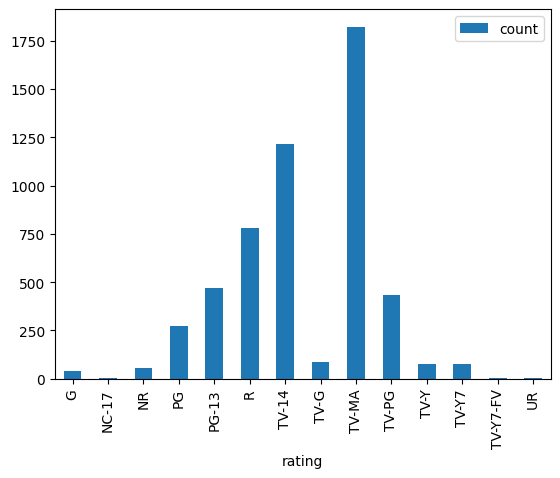

In [16]:
grouped_by_ratings_df.plot.bar(x='rating',y='count')